In [265]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


In [324]:
# 1 - Read the column description and ensure you understand each attribute well
loans = pd.read_csv("Bank_Personal_Loan_Modelling.csv")
# loans = loans.drop('ID',axis=1)
loans.head(5)


,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [267]:
# 2 Study the data distribution in each attribute, share your findings.
loans.info()
loans.apply(lambda x : sum(x.isnull()))

print("\n")
print("Observation:")
print("Given dataset have No NULL values")
print("ID and ZIP code does not seem to add value as there would not be any relatioship between ID and personal loan.")

print("\n")
print("Personal Loan is the target variable. Did the customer took personal loan based on the previous campaign")
print("\n")

print("Binary Variables:")
print("Securities Account: Does the customer has Securities Account with the bank?")
print("CD Account: Does the customer has CD Account with the bank?")
print("Online: Does the customer uses online banking facility of the bank?")
print("CreditCard: does the user has credit card?")

print("\n")
print("Interval variables:")
print("Age, Income, Experience, CCAvg, Mortgage are interval variables")
print("\n")

print("Ordinal variables:")
print("Education, Family are ordinal values where the order matters not the difference")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
ID                    5000 non-null int64
Age                   5000 non-null int64
Experience            5000 non-null int64
Income                5000 non-null int64
ZIP Code              5000 non-null int64
Family                5000 non-null int64
CCAvg                 5000 non-null float64
Education             5000 non-null int64
Mortgage              5000 non-null int64
Personal Loan         5000 non-null int64
Securities Account    5000 non-null int64
CD Account            5000 non-null int64
Online                5000 non-null int64
CreditCard            5000 non-null int64
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


Observation:
Given dataset have No NULL values
ID and ZIP code does not seem to add value as there would not be any relatioship between ID and personal loan.


Personal Loan loan is the target variable. Did the customer took personal loan based on 

In [325]:
loans.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


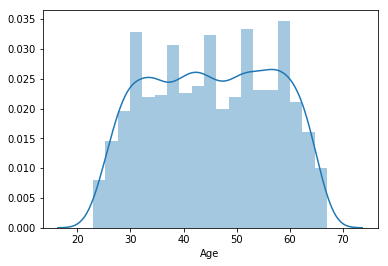

Age variable is normally distributed. This can be inferred from the able to data description table as the mean an mead are almost same values. Majority of age is distributed between 30 and 60


In [269]:
sns.distplot(loans.Age)
plt.show()
print("Age variable is normally distributed. This can be inferred from the table to data description table as the mean an mead are almost same values. Majority of age is distributed between 30 and 60")

In [270]:
print("Age variable is normally distributed. This can be inferred with the . Majority of age is distributed between 30 and 60")

Age variable is normally distributed. This can be inferred with the . Majority of age is distributed between 30 and 60


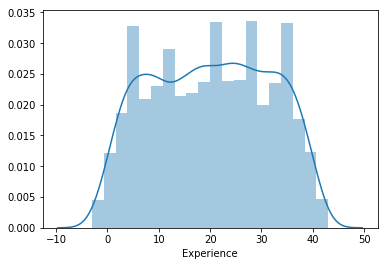

Obeservation:
From data describe we can see that mean and median of experience is same and the data is also normally distributed
If you see the mimum experience value from describe, it is a negative value. So there may be some input errors while entering the data. So this needs data cleanup before we predict the hypothesis


In [271]:
sns.distplot(loans.Experience)
plt.show()
print("Obeservation:")
print("From data describe we can see that mean and median of experience is same and the data is also normally distributed")
print("If you see the mimum experience value from describe, it is a negative value. So there may be some input errors while entering the data. So this needs data cleanup before we predict the hypothesis")

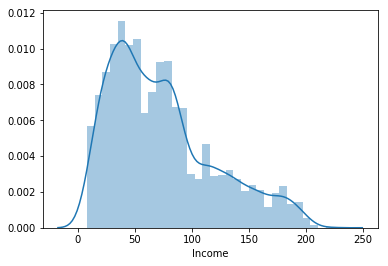

Observation:
From the plot we see that it is right skewed or positive skewed.
The mean value is greater than median value. Majority of the salary is distributed between 40 to 90.


In [445]:
sns.distplot(loans.Income)
plt.show()

print("Observation:")
print("From the plot we see that it is right skewed or positive skewed.")
print("The mean value is greater than median value. Majority of the salary is distributed between 40 to 90.")

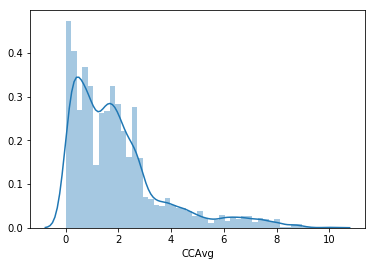

CCAvg is positive skewed graph.
People spend zero to 10K with majority of people spending 0 to 3K approximately


In [273]:
sns.distplot(loans.CCAvg)
plt.show()
print("CCAvg is positive skewed graph.")
print("People spend zero to 10K with majority of people spending 0 to 3K approximately")


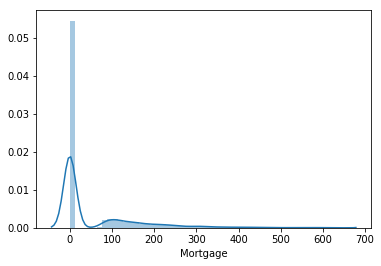

Majority of the people have mortgage between 0 to 10 K


In [274]:
sns.distplot(loans.Mortgage)
plt.show()
print("Majority of the people have mortgage between 0 to 10 K")

In [275]:
# Bivariate analysis
# print("Interval variables:")
print("Age, Income,Experience, CCAvg, Mortgage are interval variables")




Age, Income,Experience, CCAvg, Mortgage are interval variables


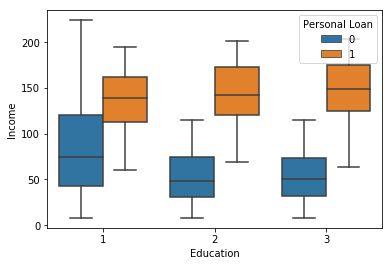

Observation:
Customers having Education 1 have more income than others. However people who have availed loans have same income levels


In [446]:
# Influence of Education and Income on personal loan

sns.boxplot(x='Education',y='Income',hue='Personal Loan',data=loans)
plt.show()
print("Observation:")
print("Customers having Education 1 have more income than others. However people who have availed loans have same income levels")

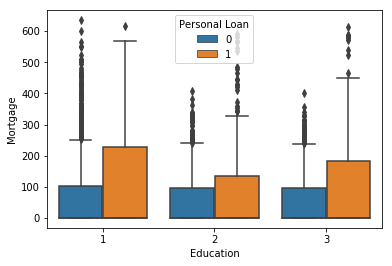

Person with loan and without loan have high mortgage values


In [277]:
sns.boxplot(x='Education',y='Mortgage',hue='Personal Loan',data=loans)
plt.show()
print("Person with loan and without loan have high mortgage values")

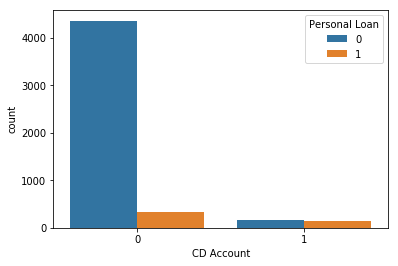

Observation:
Majority of customers who do not have CD Account has taken more personal loan than group of customers who has CD account


In [278]:
sns.countplot(x="CD Account", data=loans,hue="Personal Loan")
plt.show()
print("Observation:")
print("Majority of customers who do not have CD Account has taken more personal loan than group of customers who has CD account")


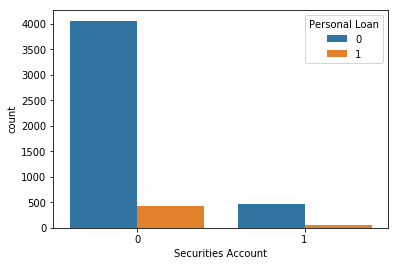

Observation:
Majority of customers who do not have Securities Account has taken personal loan than group of people who has Securities Account


In [279]:
sns.countplot(x="Securities Account", data=loans,hue="Personal Loan")
plt.show()
print("Observation:")
print("Majority of customers who do not have Securities Account has taken personal loan than group of people who has Securities Account")

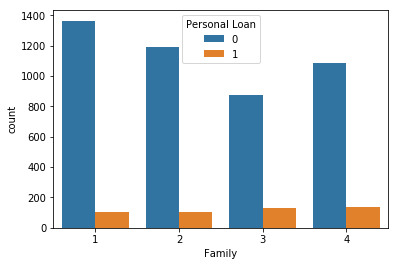

Observation:
Family size does not have an impact on personal loan


In [280]:
sns.countplot(x='Family',data=loans,hue='Personal Loan')
plt.show()
print("Observation:")
print("Family size does not have an impact on personal loan")

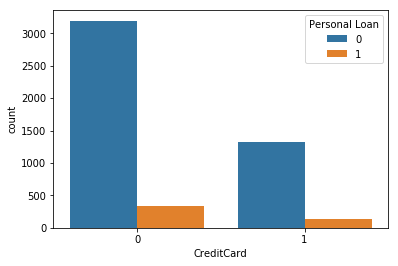

Observation:
Majority of the people who do not have Credit card have personal loan compared to the majority who do not have credit card 


In [281]:
sns.countplot(x='CreditCard',data=loans,hue='Personal Loan')
plt.show()
print("Observation:")
print("Majority of the people who do not have Credit card have personal loan compared to the majority who do not have credit card ")

In [282]:
loans.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

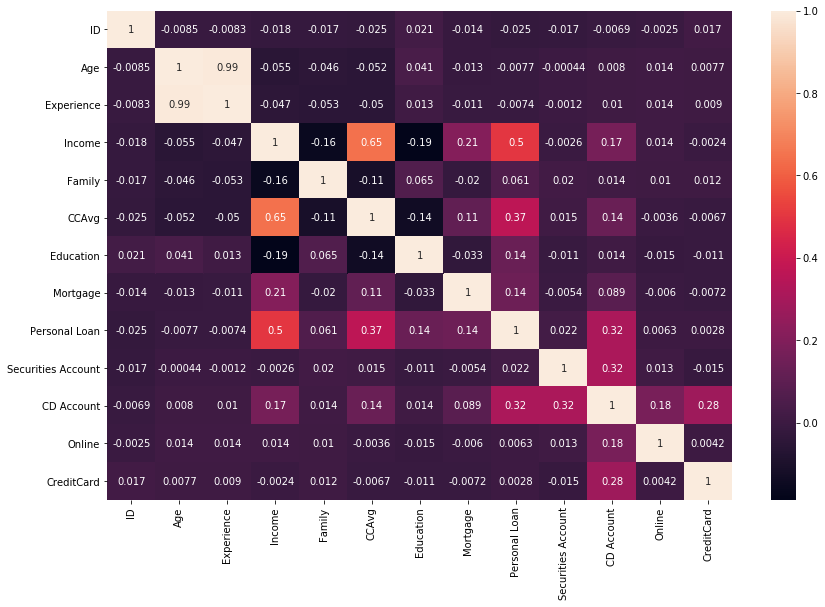

In [283]:
loans_mod = loans.drop("ZIP Code", axis=1)
loan_corr = loans_mod.corr()
# loan_corr


f, ax = plt.subplots(figsize=(14, 9))
sns.heatmap(loan_corr, 
            xticklabels=loan_corr.columns.values,
            yticklabels=loan_corr.columns.values,annot= True)
plt.show()

In [ ]:
# sns.boxplot(loan.)

In [321]:
#Q4 Split the data into training and test set in the ratio of 70:30 respectively
loans.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


In [431]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, f1_score, auc, roc_curve


# Data Cleaning
# From the above table experience have some negative values

#clean the negative variable
# dfLoans = pd.read_csv("Bank_Personal_Loan_Modelling.csv")

# dfExp = dfLoans.loc[dfLoans['Experience'] >0]
# negExp = dfLoans.Experience < 0
# column_name = 'Experience'
# mylist = dfLoans.loc[negExp]['ID'].tolist() # getting the customer ID who has negative experience

# # there are 52 records with negative experience
# negExp.value_counts()
# print("There are 52 records with Negative values")
# dfLoans.info()


In [336]:
# for id in mylist:
#     age = dfLoans.loc[np.where(dfLoans['ID']==id)]["Age"].tolist()[0]
#     education = dfLoans.loc[np.where(dfLoans['ID']==id)]["Education"].tolist()[0]
#     df_filtered = dfExp[(dfExp.Age == age) & (dfExp.Education == education)]
#     exp = df_filtered['Experience'].median()
#     dfLoans.loc[dfLoans.loc[np.where(dfLoans['ID']==id)].index, 'Experience'] = exp
    
# # checking if there are records with negative experience
# dfLoans[dfLoans['Experience'] < 0]['Experience'].count()

0

In [383]:
dfLoans.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


In [459]:
# Logistic Regression
# Split Data into 70:30

dfLoans = pd.read_csv("Bank_Personal_Loan_Modelling.csv")
dfLoans.head()

X_D = dfLoans.drop(["Personal Loan","ZIP Code","Experience","ID"], axis=1)
y_D = dfLoans["Personal Loan"]

X.head()

,ID,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,4,1.6,1,0,1,0,0,0
1,2,45,19,34,3,1.5,1,0,1,0,0,0
2,3,39,15,11,1,1.0,1,0,0,0,0,0
3,4,35,9,100,1,2.7,2,0,0,0,0,0
4,5,35,8,45,4,1.0,2,0,0,0,0,1


In [477]:
def logisticRegModelPerformanceAnalysis(X, y, test_size = 0.3, seed = 7):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)
    model = LogisticRegression()
    model.fit(X_train, y_train)
    ### Unoptimized probability threshold based performance numbers
    # Train accuracy numbers
    trainPreds = np.where(model.predict_proba(X_train)[:,1] > 0.5, 1, 0)
    trainAccuracy = accuracy_score(y_train, trainPreds)
    trainRecall = recall_score(y_train, trainPreds)
    trainPrecision = precision_score(y_train, trainPreds)
    trainF1score = f1_score(y_train, trainPreds)
    trainResults=[X_train.shape[0], 0.5, trainAccuracy, trainRecall, trainPrecision, trainF1score]
    # Test accuracy numbers
    testPreds = np.where(model.predict_proba(X_test)[:,1] > 0.5, 1, 0)
    testAccuracy = accuracy_score(y_test, testPreds)
    testRecall = recall_score(y_test, testPreds)
    testPrecision = precision_score(y_test, testPreds)
    testF1score = f1_score(y_test, testPreds)
    testResults=[X_test.shape[0], 0.5, testAccuracy, testRecall, testPrecision, testF1score]
    
    #### Optimize probability threshold and calculate performance numbers
    y_predictProb = model.predict_proba(X_train)
    fpr, tpr, thresholds = roc_curve(y_train, y_predictProb[::,1])
    optimalF1 = 0
    optimalTh = 0
    for th in thresholds:
        preds = np.where(model.predict_proba(X_train)[:,1] > th, 1, 0)
        f1Score = f1_score(y_train, preds)
        if(optimalF1 < f1Score):
            optimalF1 = f1Score
            optimalTh = th

    resultsDf = pd.DataFrame( index=["dataSize", "optimalTh", "accuracy", "recall", "precision", "f1_score"])
    # Optimal probability threshold based train accuracy numbers
    trainPreds = np.where(model.predict_proba(X_train)[:,1] > optimalTh, 1, 0)
    trainAccuracy = accuracy_score(y_train, trainPreds)
    trainRecall = recall_score(y_train, trainPreds)
    trainPrecision = precision_score(y_train, trainPreds)
    trainF1score = f1_score(y_train, trainPreds)
    optimalTrainResults=[X_train.shape[0], optimalTh, trainAccuracy, trainRecall, trainPrecision, trainF1score]
    # Optimal probability threshold based test accuracy numbers
    testPreds = np.where(model.predict_proba(X_test)[:,1] > optimalTh, 1, 0)
    testAccuracy = accuracy_score(y_test, testPreds)
    testRecall = recall_score(y_test, testPreds)
    testPrecision = precision_score(y_test, testPreds)
    testF1score = f1_score(y_test, testPreds)
    optimalTestResults=[X_test.shape[0], optimalTh, testAccuracy, testRecall, testPrecision, testF1score]
    # Concatenate Train and Test results to resultsDf
    resultsDf['unOptimalTrainResults'] = trainResults
    resultsDf['optimalTrainResults'] = optimalTrainResults
    resultsDf['unOptimalTestResults'] = testResults
    resultsDf['optimalTestResults'] = optimalTestResults
    
    return resultsDf.round(2)

In [461]:
logisticRegModelPerformanceAnalysis(X_D,y_D)
# metrics.confusion_matrix(y_predict, y_test)


,unOptimalTrainResults,optimalTrainResults,unOptimalTestResults,optimalTestResults
dataSize,3500.00,3500.00,1500.00,1500.00
optimalTh,0.50,0.36,0.50,0.36
accuracy,0.95,0.95,0.95,0.95
recall,0.58,0.68,0.60,0.71
precision,0.83,0.75,0.85,0.75
f1_score,0.69,0.72,0.70,0.73


In [462]:
# KNN
from sklearn.neighbors import KNeighborsClassifier


In [512]:
def knnPerformanceAnalysis(X, y, neighbours, test_size = 0.3, seed = 7):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)
    model = KNeighborsClassifier(n_neighbors= neighbours, weights = 'uniform', metric='euclidean')
    model.fit(X_train, y_train)
    ### Unoptimized probability threshold based performance numbers
    # Train accuracy numbers
    trainPreds = np.where(model.predict_proba(X_train)[:,1] > 0.5, 1, 0)
    trainAccuracy = accuracy_score(y_train, trainPreds)
    trainRecall = recall_score(y_train, trainPreds)
    trainPrecision = precision_score(y_train, trainPreds)
    trainF1score = f1_score(y_train, trainPreds)
    trainResults=[X_train.shape[0], 0.5, trainAccuracy, trainRecall, trainPrecision, trainF1score]
    # Test accuracy numbers
    testPreds = np.where(model.predict_proba(X_test)[:,1] > 0.5, 1, 0)
    testAccuracy = accuracy_score(y_test, testPreds)
    testRecall = recall_score(y_test, testPreds)
    testPrecision = precision_score(y_test, testPreds)
    testF1score = f1_score(y_test, testPreds)
    testResults=[X_test.shape[0], 0.5, testAccuracy, testRecall, testPrecision, testF1score]
    
    #### Optimize probability threshold and calculate performance numbers
    y_predictProb = model.predict_proba(X_train)
    fpr, tpr, thresholds = roc_curve(y_train, y_predictProb[::,1])
    optimalF1 = 0
    optimalTh = 0
    for th in thresholds:
        preds = np.where(model.predict_proba(X_train)[:,1] > th, 1, 0)
        f1Score = f1_score(y_train, preds)
        if(optimalF1 < f1Score):
            optimalF1 = f1Score
            optimalTh = th

    resultsDf = pd.DataFrame( index=["dataSize", "optimalTh", "accuracy", "recall", "precision", "f1_score"])
    # Optimal probability threshold based train accuracy numbers
    trainPreds = np.where(model.predict_proba(X_train)[:,1] > optimalTh, 1, 0)
    trainAccuracy = accuracy_score(y_train, trainPreds)
    trainRecall = recall_score(y_train, trainPreds)
    trainPrecision = precision_score(y_train, trainPreds)
    trainF1score = f1_score(y_train, trainPreds)
    optimalTrainResults=[X_train.shape[0], optimalTh, trainAccuracy, trainRecall, trainPrecision, trainF1score]
    # Optimal probability threshold based test accuracy numbers
    testPreds = np.where(model.predict_proba(X_test)[:,1] > optimalTh, 1, 0)
    testAccuracy = accuracy_score(y_test, testPreds)
    testRecall = recall_score(y_test, testPreds)
    testPrecision = precision_score(y_test, testPreds)
    testF1score = f1_score(y_test, testPreds)
    optimalTestResults=[X_test.shape[0], optimalTh, testAccuracy, testRecall, testPrecision, testF1score]
    # Concatenate Train and Test results to resultsDf
    resultsDf['unOptimalTrainResults'] = trainResults
    resultsDf['optimalTrainResults'] = optimalTrainResults
    resultsDf['unOptimalTestResults'] = testResults
    resultsDf['optimalTestResults'] = optimalTestResults
    
    return resultsDf.round(2)

In [519]:
knnPerformanceAnalysis(X_D,y_D,21)

,unOptimalTrainResults,optimalTrainResults,unOptimalTestResults,optimalTestResults
dataSize,3500.00,3500.00,1500.00,1500.00
optimalTh,0.50,0.24,0.50,0.24
accuracy,0.91,0.88,0.92,0.88
recall,0.27,0.77,0.23,0.76
precision,0.62,0.44,0.67,0.43
f1_score,0.38,0.56,0.34,0.55


In [523]:
# Naïve Bayes
from sklearn.naive_bayes import GaussianNB
def naivesPerformanceAnalysis(X, y, test_size = 0.3, seed = 7):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)
    model = GaussianNB()
    model.fit(X_train, y_train)
    ### Unoptimized probability threshold based performance numbers
    # Train accuracy numbers
    trainPreds = np.where(model.predict_proba(X_train)[:,1] > 0.5, 1, 0)
    trainAccuracy = accuracy_score(y_train, trainPreds)
    trainRecall = recall_score(y_train, trainPreds)
    trainPrecision = precision_score(y_train, trainPreds)
    trainF1score = f1_score(y_train, trainPreds)
    trainResults=[X_train.shape[0], 0.5, trainAccuracy, trainRecall, trainPrecision, trainF1score]
    # Test accuracy numbers
    testPreds = np.where(model.predict_proba(X_test)[:,1] > 0.5, 1, 0)
    testAccuracy = accuracy_score(y_test, testPreds)
    testRecall = recall_score(y_test, testPreds)
    testPrecision = precision_score(y_test, testPreds)
    testF1score = f1_score(y_test, testPreds)
    testResults=[X_test.shape[0], 0.5, testAccuracy, testRecall, testPrecision, testF1score]
    
    #### Optimize probability threshold and calculate performance numbers
    y_predictProb = model.predict_proba(X_train)
    fpr, tpr, thresholds = roc_curve(y_train, y_predictProb[::,1])
    optimalF1 = 0
    optimalTh = 0
    for th in thresholds:
        preds = np.where(model.predict_proba(X_train)[:,1] > th, 1, 0)
        f1Score = f1_score(y_train, preds)
        if(optimalF1 < f1Score):
            optimalF1 = f1Score
            optimalTh = th

    resultsDf = pd.DataFrame( index=["dataSize", "optimalTh", "accuracy", "recall", "precision", "f1_score"])
    # Optimal probability threshold based train accuracy numbers
    trainPreds = np.where(model.predict_proba(X_train)[:,1] > optimalTh, 1, 0)
    trainAccuracy = accuracy_score(y_train, trainPreds)
    trainRecall = recall_score(y_train, trainPreds)
    trainPrecision = precision_score(y_train, trainPreds)
    trainF1score = f1_score(y_train, trainPreds)
    optimalTrainResults=[X_train.shape[0], optimalTh, trainAccuracy, trainRecall, trainPrecision, trainF1score]
    # Optimal probability threshold based test accuracy numbers
    testPreds = np.where(model.predict_proba(X_test)[:,1] > optimalTh, 1, 0)
    testAccuracy = accuracy_score(y_test, testPreds)
    testRecall = recall_score(y_test, testPreds)
    testPrecision = precision_score(y_test, testPreds)
    testF1score = f1_score(y_test, testPreds)
    optimalTestResults=[X_test.shape[0], optimalTh, testAccuracy, testRecall, testPrecision, testF1score]
    # Concatenate Train and Test results to resultsDf
    resultsDf['unOptimalTrainResults'] = trainResults
    resultsDf['optimalTrainResults'] = optimalTrainResults
    resultsDf['unOptimalTestResults'] = testResults
    resultsDf['optimalTestResults'] = optimalTestResults
    
    return resultsDf.round(2)


In [525]:
naivesPerformanceAnalysis(X_D,y_D)


,unOptimalTrainResults,optimalTrainResults,unOptimalTestResults,optimalTestResults
dataSize,3500.00,3500.00,1500.00,1500.00
optimalTh,0.50,0.06,0.50,0.06
accuracy,0.88,0.87,0.88,0.87
recall,0.56,0.81,0.59,0.86
precision,0.42,0.41,0.40,0.39
f1_score,0.48,0.54,0.48,0.54


In [543]:
#Print the confusion matrix for all the above models

test_size = 0.30 # taking 70:30 training and test set
seed = 7  # Random numbmer seeding for reapeatability of the code
X_train, X_test, y_train, y_test = train_test_split(X_D,y_D, test_size=test_size, random_state=seed)

#Logitics Regression
model_logistics = LogisticRegression()
model_logistics.fit(X_train,y_train)
log_yPredict = model_logistics.predict(X_test)
print("Confusion Matrix for Logistic Regression")
metrics.confusion_matrix(log_yPredict, y_test)


Confusion Matrix for Logistic Regression


array([[1347,   55],
       [  15,   83]], dtype=int64)

In [548]:
#KNN
model_knn = KNeighborsClassifier(n_neighbors= 21, weights = 'uniform', metric='euclidean')

model_knn.fit(X_train,y_train)
knn_yPredict = model_knn.predict(X_test)
print("Confusion Matrix for KNN")
metrics.confusion_matrix(knn_yPredict, y_test)



Confusion Matrix for KNN


array([[1346,  106],
       [  16,   32]], dtype=int64)

In [545]:
# Naïve Bayes
model_gnb = GaussianNB()
model_gnb.fit(X_train,y_train)
gnb_yPredict = model_gnb.predict(X_test)
print("Confusion Matrix for Naïve Bayes")
metrics.confusion_matrix(gnb_yPredict, y_test)


Confusion Matrix for Naïve Bayes


array([[1237,   56],
       [ 125,   82]], dtype=int64)

KNN: 0.900400 (0.013559)
GNN: 0.885200 (0.011634)
LR: 0.948200 (0.008122)


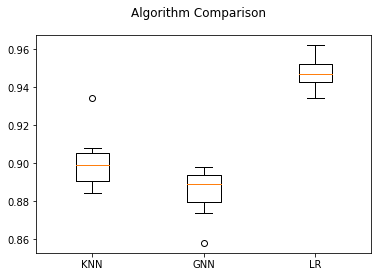

In [551]:
# Give your reasoning on which is the best model in this case and why it performs better? (10 points)
from sklearn import model_selection
models = []
models.append(('KNN', KNeighborsClassifier()))
models.append(('GNN', GaussianNB()))
models.append(('LR', LogisticRegression()))
# models.append(('RF', RandomForestClassifier()))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=12345)
    cv_results = model_selection.cross_val_score(model, X, y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()


In [ ]:
print("Logistics regression has modelseems to have high accuracy. We can choose that as our final model for the   ")